In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

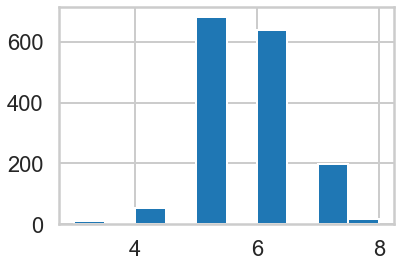

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.14181438998957246
% Good wines in Testing: 0.1265625


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 7, 'min_samples_leaf': 3} 0.30501061117919637 {'mean_fit_time': array([0.        , 0.0003993 , 0.00193396, 0.00300808, 0.00123878,
       0.00044146, 0.00088716, 0.00019908, 0.        , 0.00328021,
       0.00162454, 0.00148897, 0.        , 0.00019989, 0.00019965,
       0.00019488, 0.00321403, 0.        , 0.00149798, 0.00019922,
       0.        , 0.        , 0.00334234, 0.        , 0.        ,
       0.        , 0.00313525, 0.00312424, 0.00312448, 0.00019922,
       0.00316367, 0.00312352, 0.00315871, 0.        , 0.        ,
       0.00312352, 0.00315871, 0.00316367, 0.00312409, 0.        ,
       0.00316367, 0.00312495]), 'std_fit_time': array([0.        , 0.00048904, 0.00167769, 0.00503111, 0.00154568,
       0.00054497, 0.00126976, 0.00039816, 0.        , 0.00656042,
       0.00277646, 0.00203905, 0.        , 0.00039978, 0.0003993 ,
       0.00038977, 0.00625229, 0.        , 0.00299597, 0.00039845,
       0.        , 0.        , 0.00668468, 0.        

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


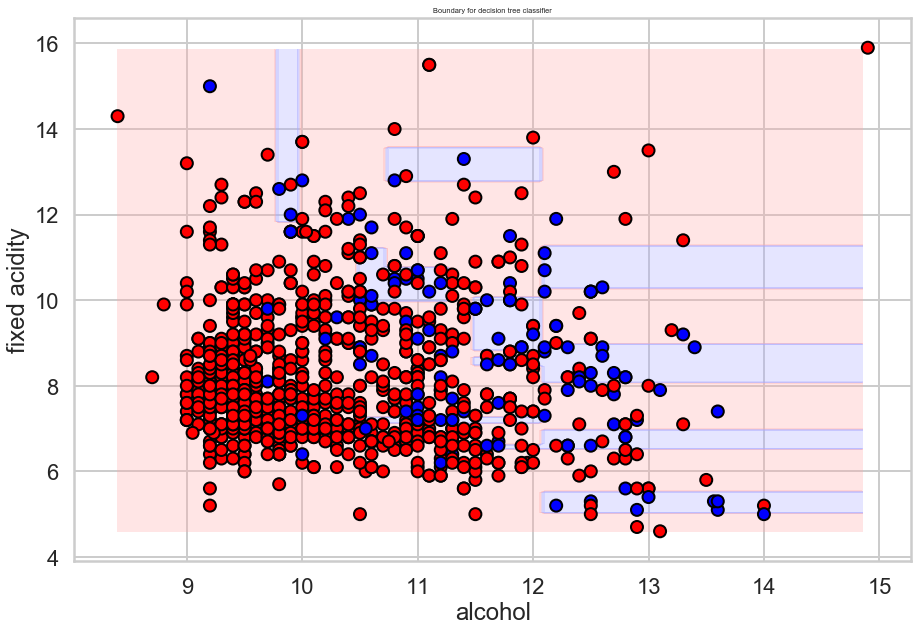

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

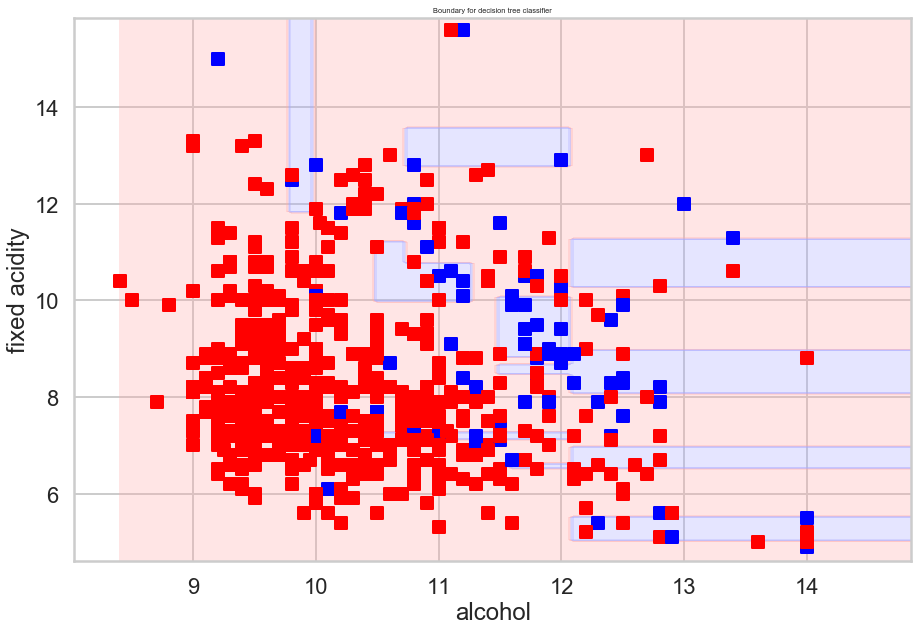

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 6} 0.21022201073868052 {'mean_fit_time': array([0.00315423, 0.00136909, 0.00173922]), 'std_fit_time': array([0.00242416, 0.00171948, 0.00214179]), 'mean_score_time': array([0.00373654, 0.00161519, 0.00153294]), 'std_score_time': array([0.00296594, 0.00159365, 0.00206478]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.12121212, 0.17142857, 0.17142857]), 'split1_test_score': array([0.22222222, 0.22857143, 0.17910448]), 'split2_test_score': array([0.3       , 0.15789474, 0.22222222]), 'split3_test_score': array([0.3478

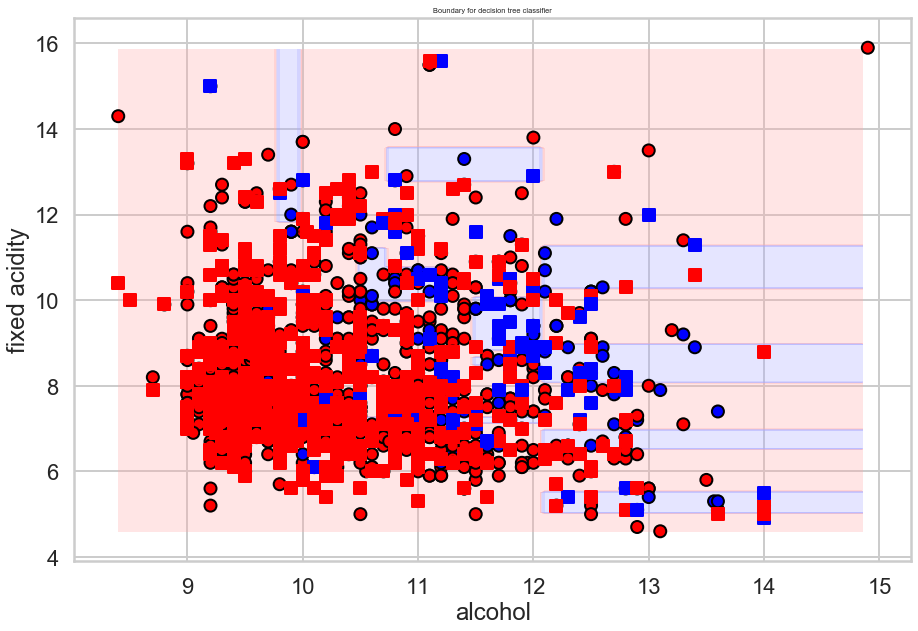

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 10} 0.4256624249506328 {'mean_fit_time': array([0.00129457, 0.00183749, 0.00122008, 0.00146365, 0.00224295,
       0.0012876 , 0.00203738, 0.00176821, 0.00253248, 0.0009984 ,
       0.00266929, 0.00125079, 0.00229692, 0.00265193, 0.0005703 ,
       0.00362639, 0.00256181, 0.00265393, 0.00059776, 0.00459652,
       0.00421829, 0.00061989, 0.00679512, 0.00232296, 0.00630388,
       0.00283632, 0.00458016, 0.00340648, 0.00062041, 0.00298753,
       0.00390968, 0.00712247, 0.00269837, 0.00806384, 0.00422268,
       0.00457716, 0.0008132 , 0.00342474, 0.01007204, 0.00647411,
       0.00624843, 0.00312424, 0.00624862, 0.00563288, 0.00534544,
       0.00513601, 0.00406756, 0.0051281 , 0.00586061, 0.00854697,
       0.00960932, 0.00937266, 0.00624852, 0.00343533, 0.00802989,
       0.00462842, 0.00447493, 0.00432162, 0.00639138, 0.00560369,
       0.00671277, 0.00580626, 0.00625072, 0.00312386, 0.00312419,
       0.00655975, 0.00808468, 0.00

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 19} 0.4117281474945708 {'mean_fit_time': array([0.00520649, 0.0033155 , 0.01395535, 0.01454854, 0.02039866,
       0.02244849, 0.02518687, 0.02434273, 0.02265205, 0.02860446,
       0.03822284, 0.04607658, 0.03690257, 0.03635845, 0.04052877,
       0.04473329, 0.0369935 , 0.04532113, 0.04991679]), 'std_fit_time': array([0.00011758, 0.00406418, 0.00342808, 0.00825452, 0.00778968,
       0.00843303, 0.00607474, 0.01107539, 0.00817783, 0.0066893 ,
       0.00666887, 0.01130702, 0.00739924, 0.00834151, 0.00534066,
       0.00274775, 0.00604642, 0.00400848, 0.00288211]), 'mean_score_time': array([0.00144496, 0.00384545, 0.00140905, 0.00537429, 0.00156136,
       0.00595737, 0.00103054, 0.00372748, 0.01290574, 0.00312424,
       0.        , 0.00019999, 0.00722556, 0.00979924, 0.00552402,
       0.00400968, 0.01189818, 0.00707521, 0.00704036]), 'std_score_time': array([1.41190363e-03, 6.13890996e-03, 1.49980864e-03, 5.81105612e-03,
       1.91505797e-03, 5.170

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


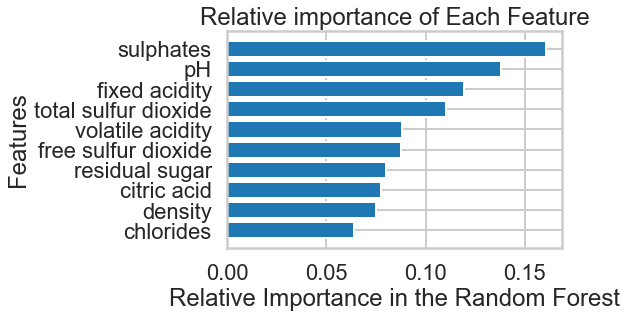

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 15} 0.44040145949367426 {'mean_fit_time': array([0.03437729, 0.04235444, 0.04336457, 0.04286518, 0.04191642,
       0.04203925, 0.05213308, 0.05664334, 0.0524941 , 0.06096764,
       0.06759834, 0.07095318, 0.0677094 , 0.06955914, 0.07905669,
       0.07583942, 0.08676968, 0.08079181, 0.08703842, 0.08878999,
       0.09950199, 0.09803243, 0.10016837, 0.1005754 , 0.10292373,
       0.10308285, 0.11151996, 0.11218858, 0.11250014, 0.11557393,
       0.12223272, 0.12431531, 0.13629355, 0.13280244, 0.13001289,
       0.13774824, 0.13595595, 0.15056667, 0.14275517, 0.14642935,
       0.15385094, 0.1509932 , 0.16008744, 0.15532084, 0.16015596,
       0.16308889, 0.16408534, 0.17121553, 0.16794367, 0.17333808]), 'std_fit_time': array([0.00522304, 0.00526527, 0.00768534, 0.00752708, 0.00755079,
       0.00901661, 0.00604544, 0.00672864, 0.00837426, 0.00625842,
       0.00634415, 0.00568808, 0.00626579, 0.00865498, 0.01132848,
       0.00679674, 0.01360218, 0.007

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 5, 'n_estimators': 43} 0.46358594661997543 {'mean_fit_time': array([0.02691178, 0.03616786, 0.03459721, 0.03350182, 0.04267368,
       0.03960791, 0.04143381, 0.03746963, 0.03494081, 0.03457756,
       0.04212971, 0.04066854, 0.04261007, 0.04269624, 0.04148631,
       0.04209633, 0.0413435 , 0.0461791 , 0.04739647, 0.04984865,
       0.04690585, 0.04883885, 0.04613647, 0.05018954, 0.04899511,
       0.0524869 , 0.04774218, 0.05787339, 0.05399814, 0.05996399,
       0.0388268 , 0.04621677, 0.04313884, 0.05025702, 0.05260715,
       0.05710912, 0.0502182 , 0.05218835, 0.05334053, 0.058992  ,
       0.05657616, 0.05798612, 0.061168  , 0.05855632, 0.05746136,
       0.06699786, 0.06197782, 0.07109718, 0.06428318, 0.07412372,
       0.07171092, 0.07308779, 0.07088251, 0.07086606, 0.07364063,
       0.08267617, 0.08135099, 0.0771769 , 0.07784281, 0.08203006,
       0.05994182, 0.06582503, 0.0616117 , 0.06677866, 0.06611233,
       0.07582464, 0.06884012, 0.07177887, 0.0703

Accuracy on training data: 0.99
Accuracy on test data:     0.89
[[533  26]
 [ 44  37]]
########################################################


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

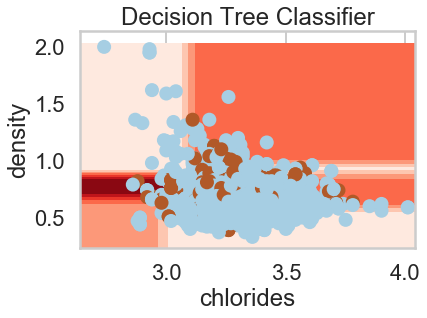

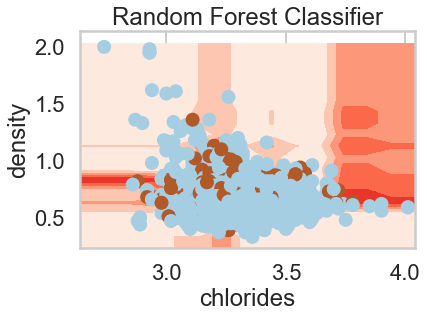

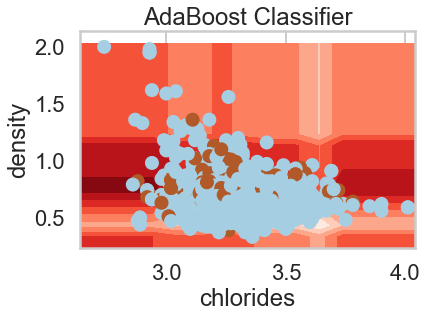

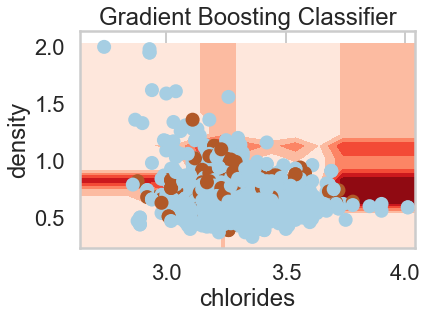

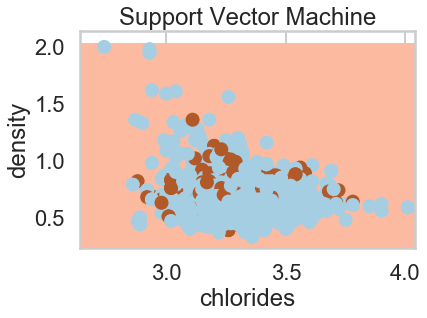

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1569    0
1570    0
1571    0
1572    0
1573    0
1574    0
1575    0
1576    0
1577    0
1578    0
1579    0
1580    0
1581    0
1582    0
1583    0
1584    1
1585    0
1586    0
1587    0
1588    0
1589    0
1590    0
1591    0
1592    0
1593    0
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32